In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
url = 'https://drive.google.com/uc?id=1n764uDPT_ZF7kzGFLtpxkwBBsDBScbWm'
df = pd.read_csv(url)

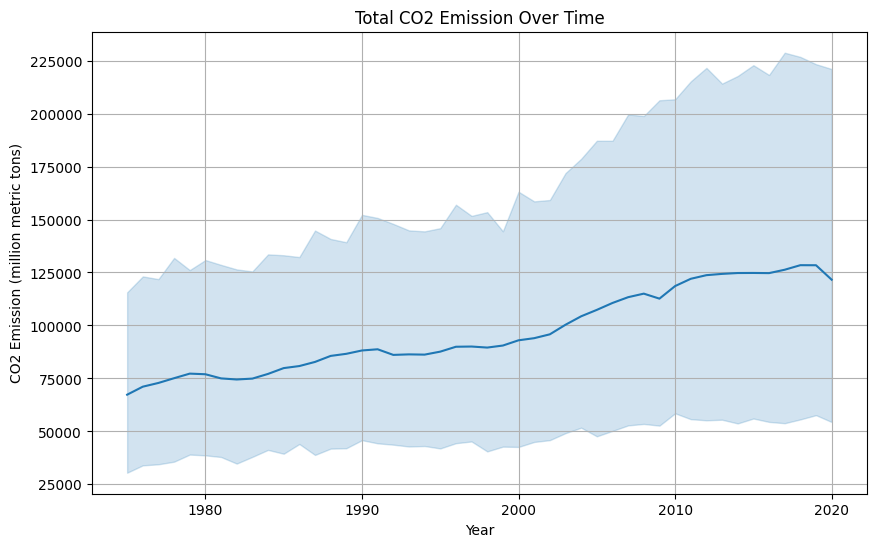

In [3]:
# Analysis 1: Total CO2 Emission Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='co2', estimator='sum')
plt.title('Total CO2 Emission Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (million metric tons)')
plt.grid(True)
plt.show()

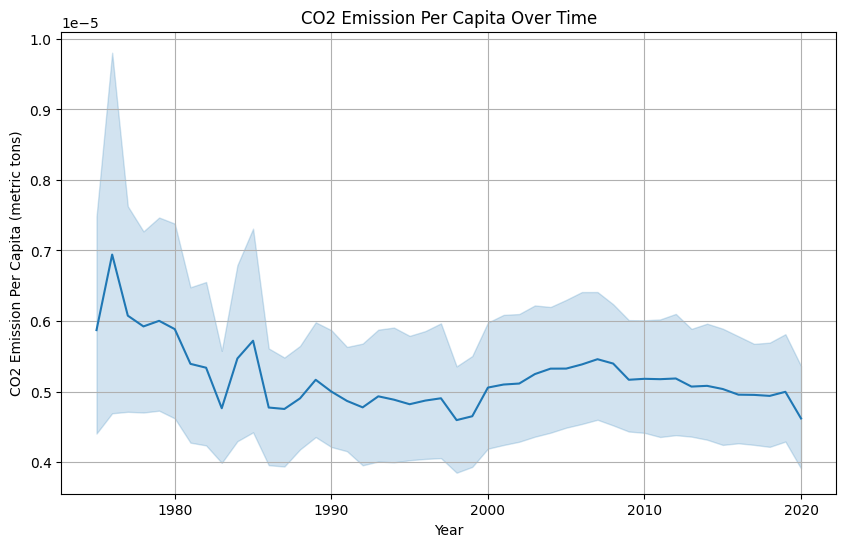

In [4]:
# Analysis 2: CO2 Emission Per Capita Over Time
df['co2_per_capita'] = df['co2'] / df['population']
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='co2_per_capita')
plt.title('CO2 Emission Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Per Capita (metric tons)')
plt.grid(True)
plt.show()

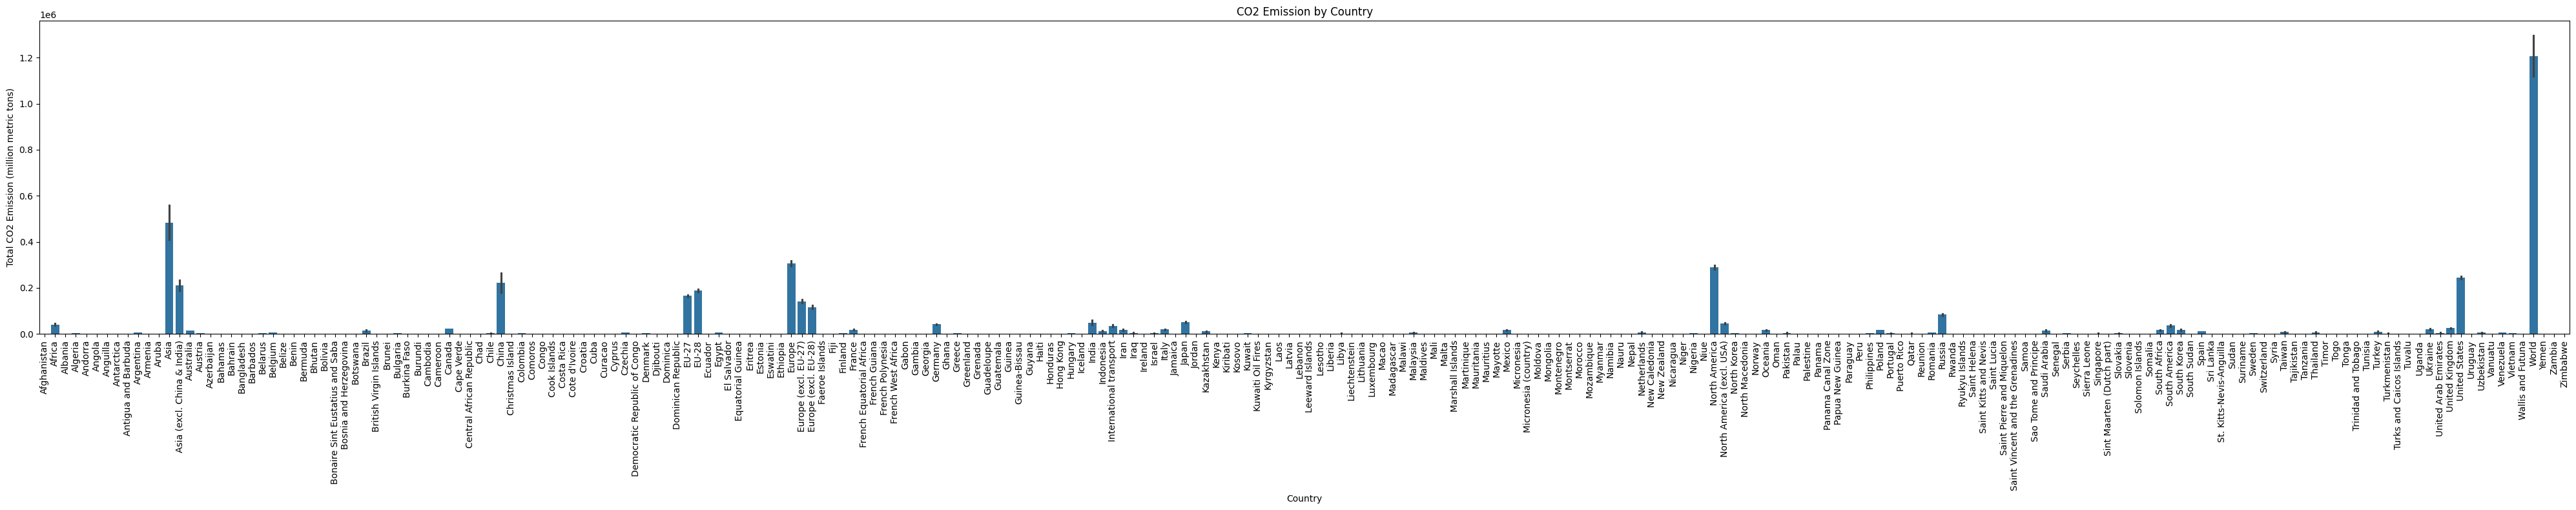

In [8]:
# Analysis 3: CO2 Emission by Country
plt.figure(figsize=(40, 8))
sns.barplot(data=df, x='country', y='co2', estimator=sum)
plt.title('CO2 Emission by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emission (million metric tons)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

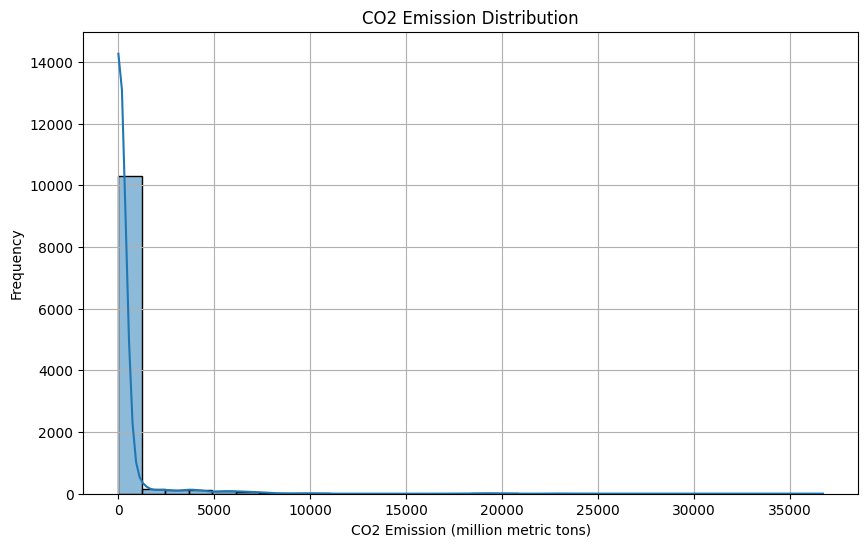

In [9]:
# Analysis 4: CO2 Emission Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='co2', bins=30, kde=True)
plt.title('CO2 Emission Distribution')
plt.xlabel('CO2 Emission (million metric tons)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

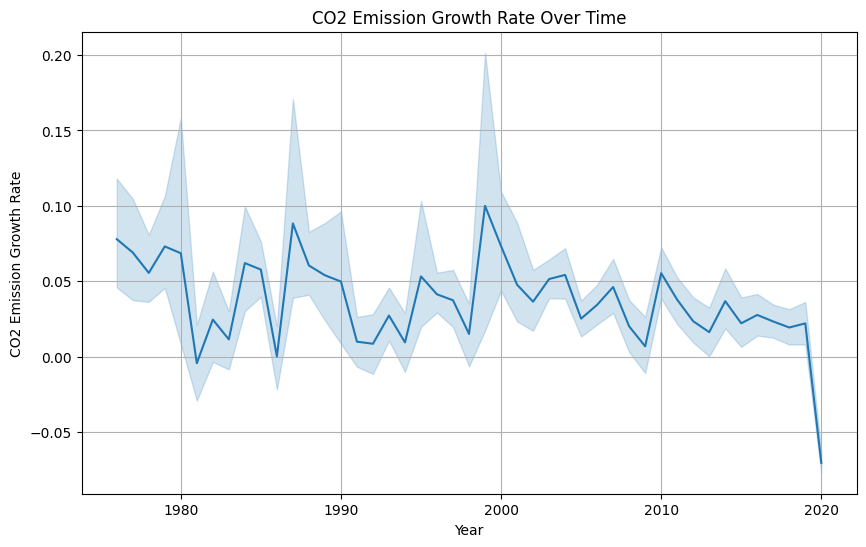

In [10]:
# Analysis 5: CO2 Emission Growth Rate
df['co2_growth_rate'] = df.groupby('country')['co2'].pct_change()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='co2_growth_rate')
plt.title('CO2 Emission Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Growth Rate')
plt.grid(True)
plt.show()

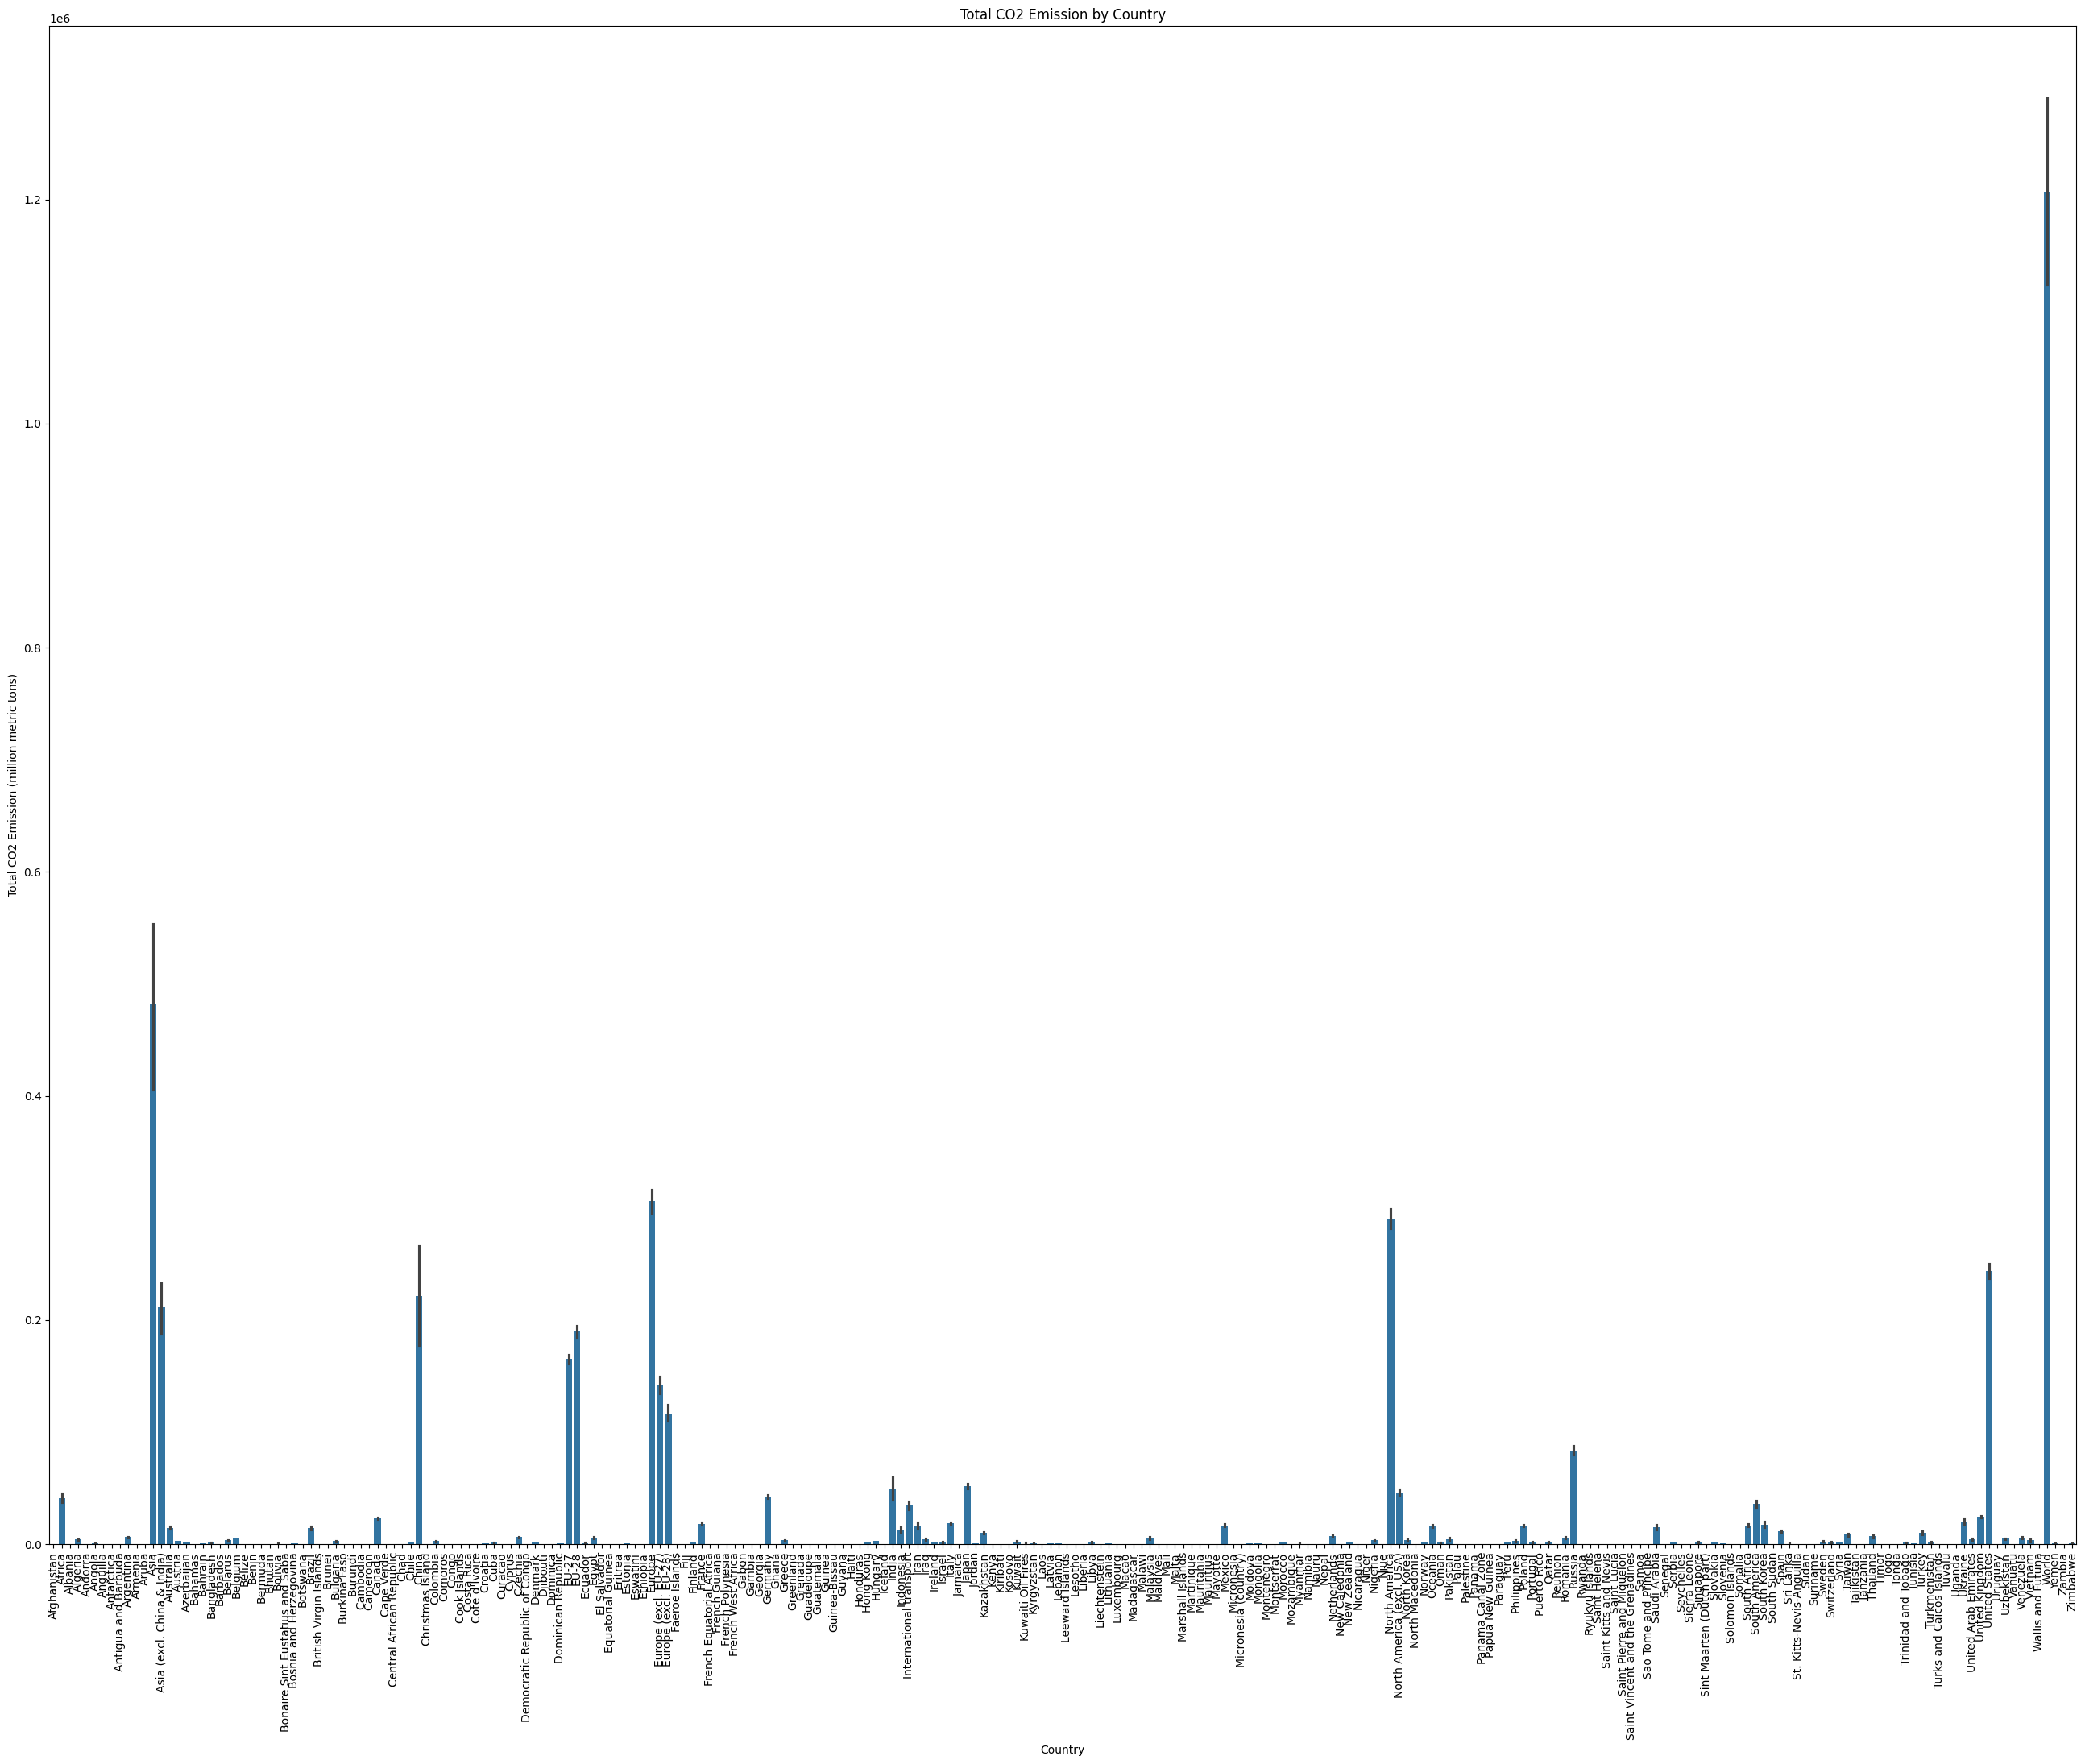

In [23]:
# Analysis 6: CO2 Emission by Country
plt.figure(figsize=(26, 22))
sns.barplot(data=df, x='country', y='co2', estimator=sum)
plt.title('Total CO2 Emission by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emission (million metric tons)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

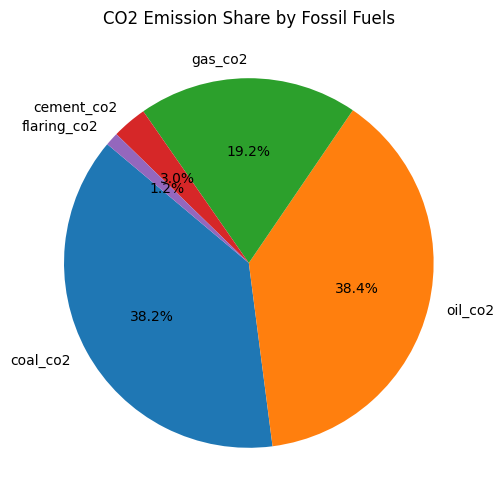

In [24]:
# Analysis 7: CO2 Emission Share by Fossil Fuels
fossil_fuels = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2']
co2_by_fossil_fuels = df[fossil_fuels].sum()
plt.figure(figsize=(8, 6))
co2_by_fossil_fuels.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('CO2 Emission Share by Fossil Fuels')
plt.ylabel('')
plt.show()

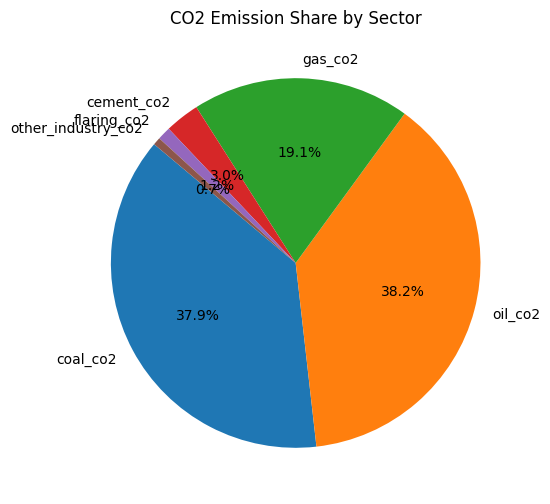

In [25]:
# Analysis 8: CO2 Emission Share by Sector
sectors = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']
co2_by_sector = df[sectors].sum()
plt.figure(figsize=(8, 6))
co2_by_sector.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('CO2 Emission Share by Sector')
plt.ylabel('')
plt.show()

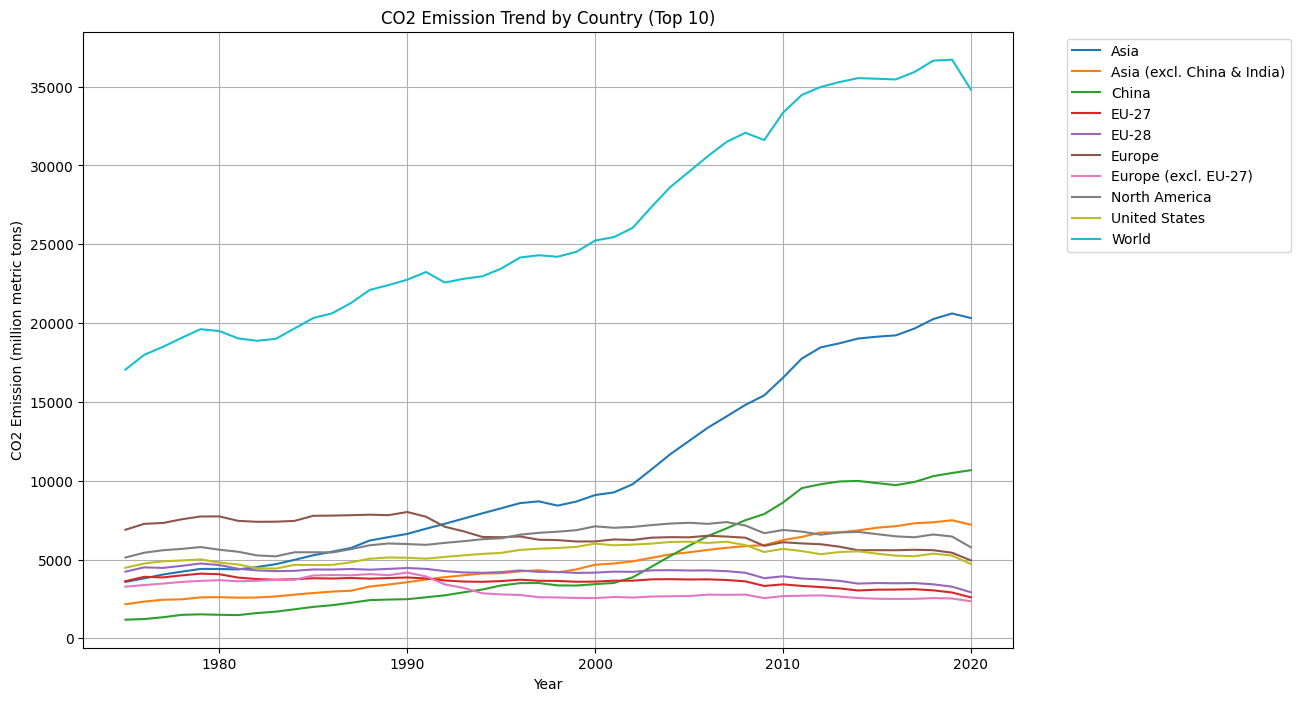

In [27]:
# Filter the top countries based on total CO2 emissions
top_countries = df.groupby('country')['co2'].sum().nlargest(10).index

# Filter the DataFrame to include data only for the top countries
df_top_countries = df[df['country'].isin(top_countries)]

# Plot CO2 emission trend by country for the top countries
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_countries, x='year', y='co2', hue='country')
plt.title('CO2 Emission Trend by Country (Top 10)')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (million metric tons)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

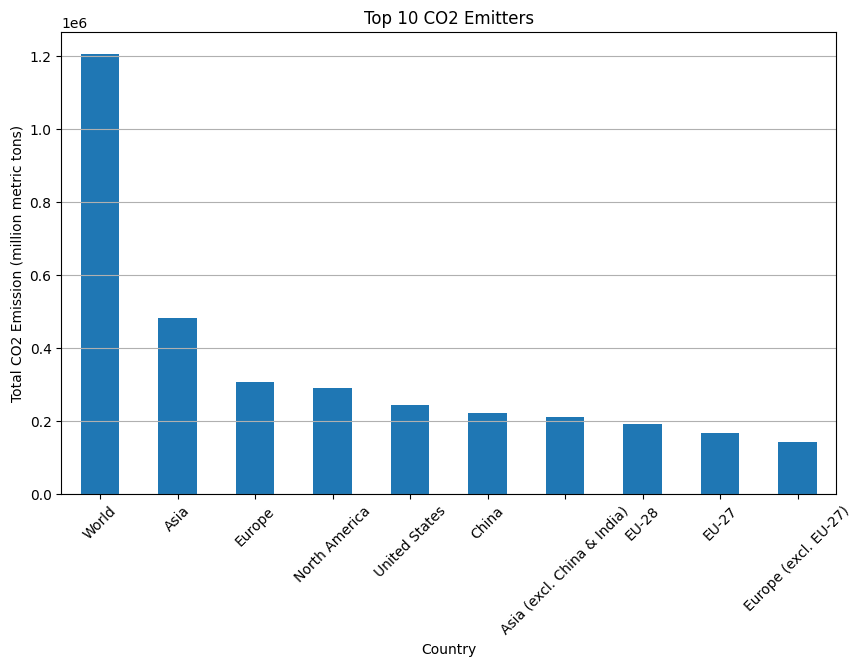

In [28]:
# Analysis 10: Largest CO2 Emitters
top_emitters = df.groupby('country')['co2'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_emitters.plot(kind='bar')
plt.title('Top 10 CO2 Emitters')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emission (million metric tons)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

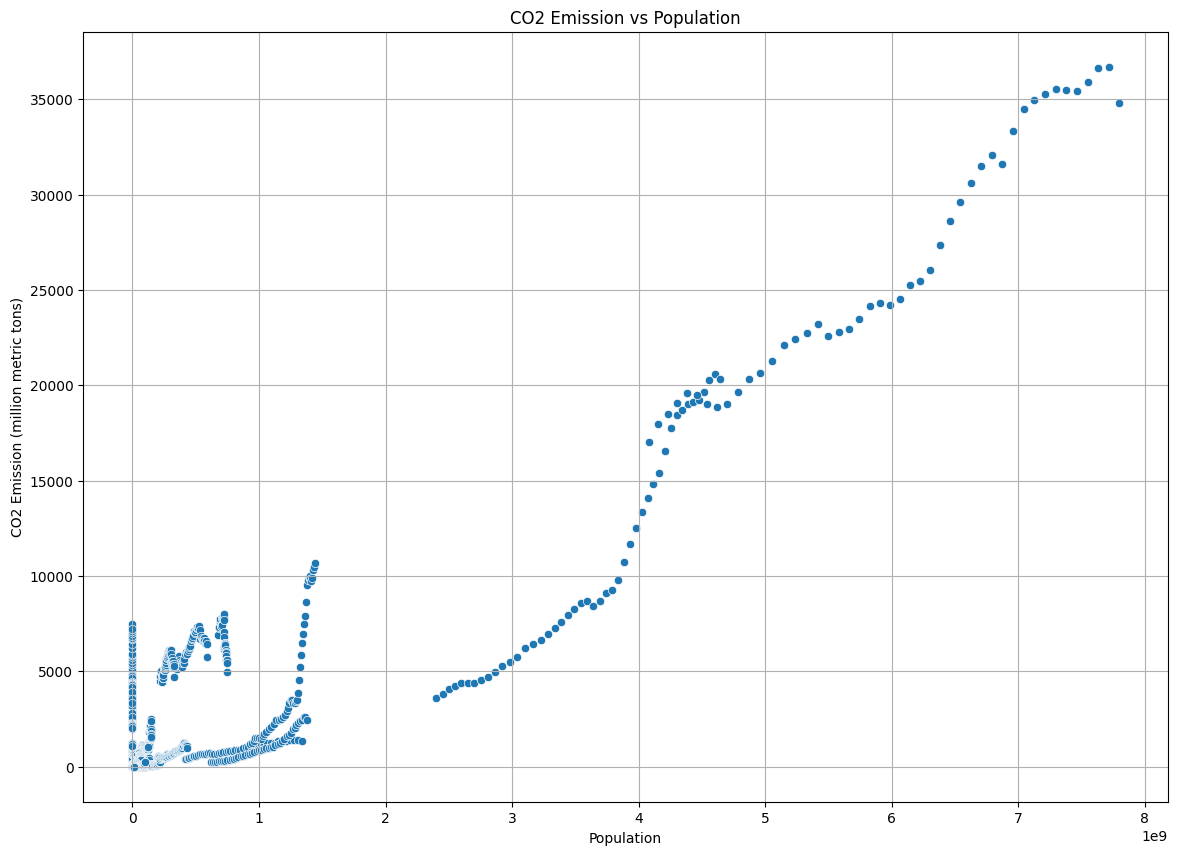

In [35]:
# Analysis 11: CO2 Emission and Population
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='population', y='co2')
plt.title('CO2 Emission vs Population')
plt.xlabel('Population')
plt.ylabel('CO2 Emission (million metric tons)')
plt.grid(True)
plt.show()

C:\Users\ravee\AppData\Local\Temp\ipykernel_22980\4216525353.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


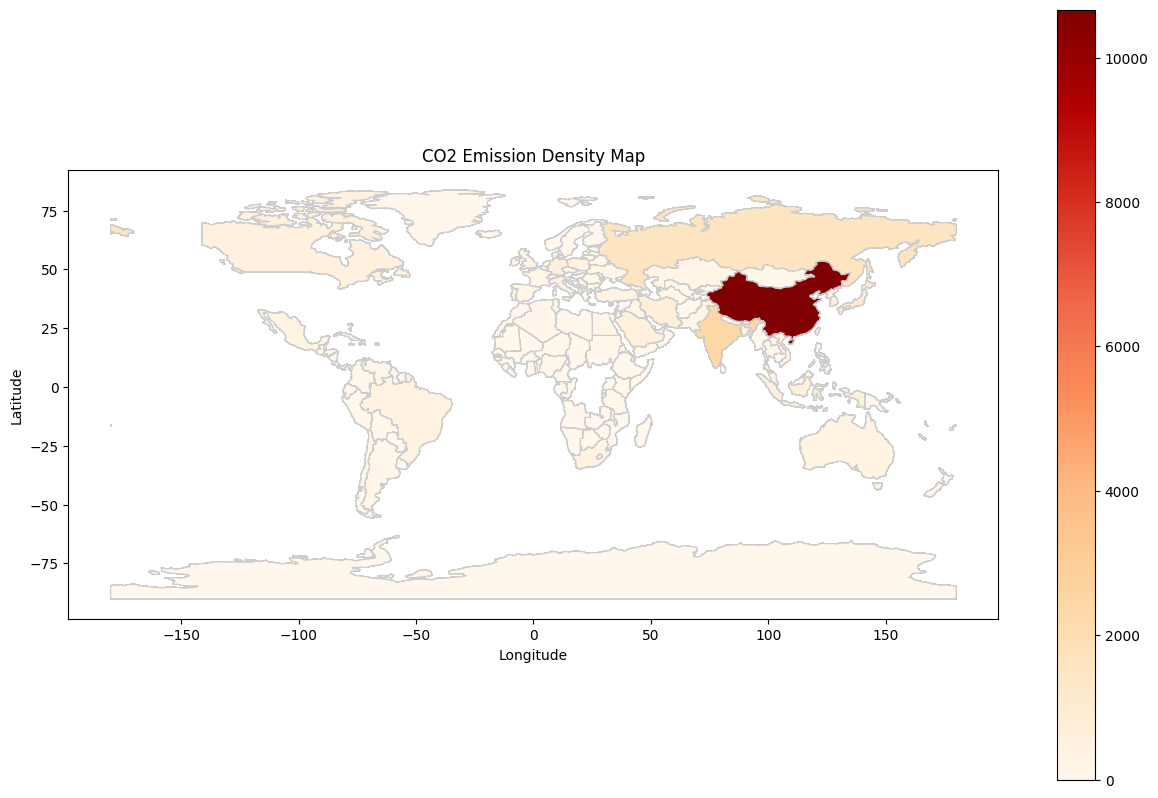

In [37]:
# Analysis 12: CO2 Emission Density Map
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'country'})
merged = world.set_index('country').join(df.set_index('country'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='co2', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('CO2 Emission Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

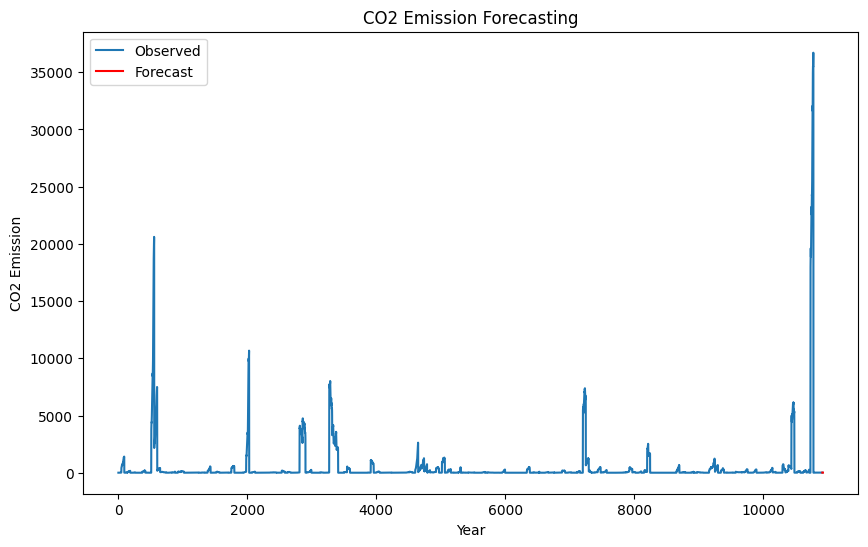

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['co2'], order=(5, 1, 0))

# Fit the ARIMA model
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['co2'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('CO2 Emission Forecasting')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()
plt.show()


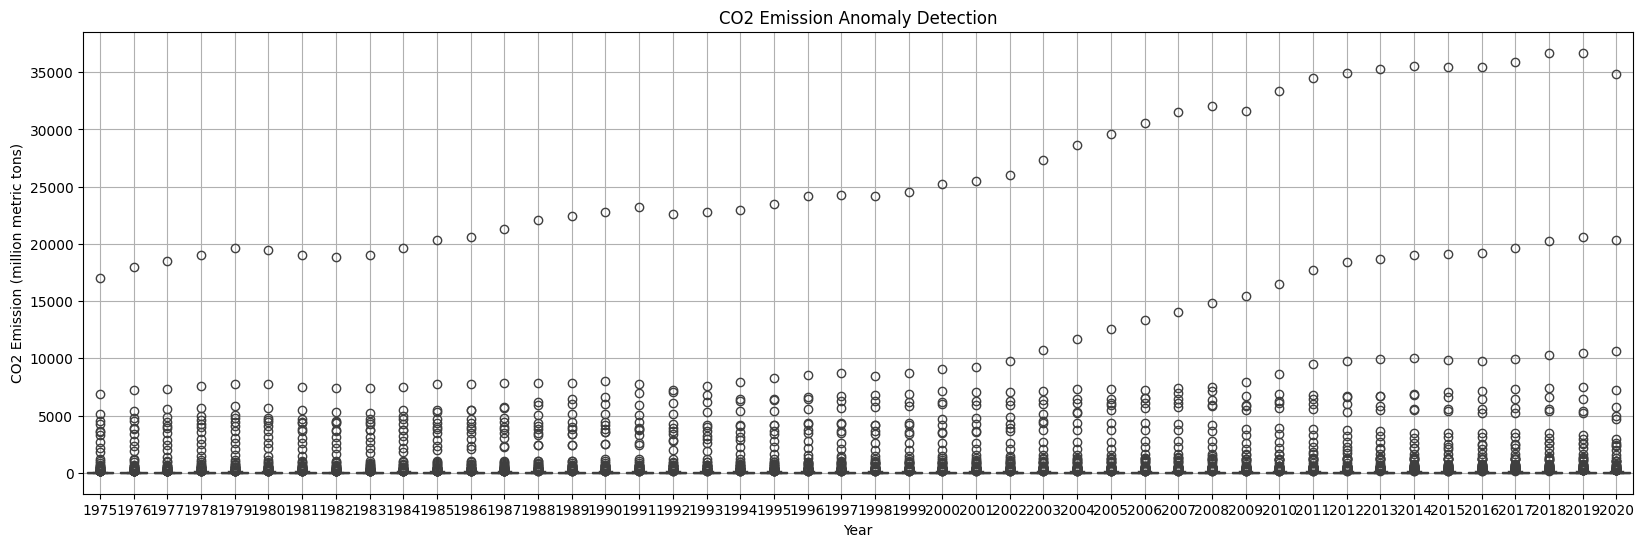

In [44]:
# Analysis 14: CO2 Emission Anomaly Detection
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='year', y='co2')
plt.title('CO2 Emission Anomaly Detection')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (million metric tons)')
plt.grid(True)
plt.show()

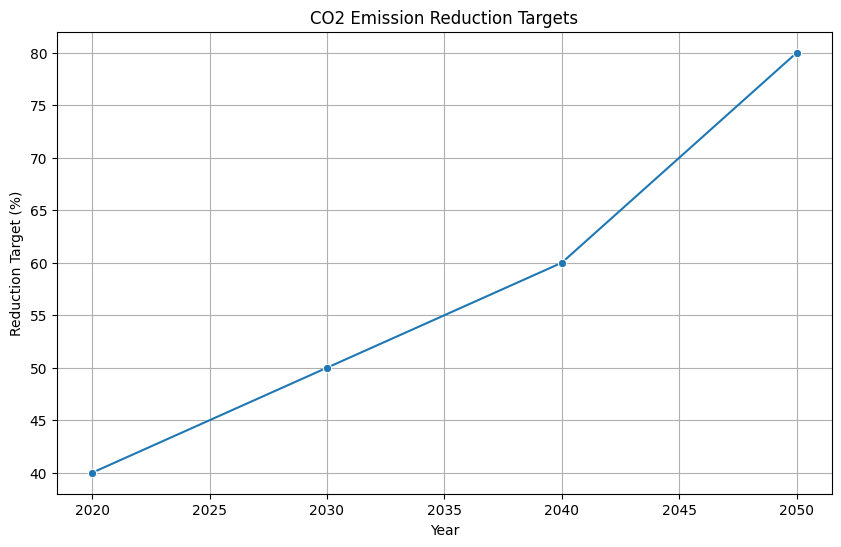

In [47]:
# Analysis 16: CO2 Emission Reduction Targets
reduction_targets = {'Year': [2020, 2030, 2040, 2050],
                     'Target': [40, 50, 60, 80]}
targets_df = pd.DataFrame(reduction_targets)
plt.figure(figsize=(10, 6))
sns.lineplot(data=targets_df, x='Year', y='Target', marker='o')
plt.title('CO2 Emission Reduction Targets')
plt.xlabel('Year')
plt.ylabel('Reduction Target (%)')
plt.grid(True)
plt.show()

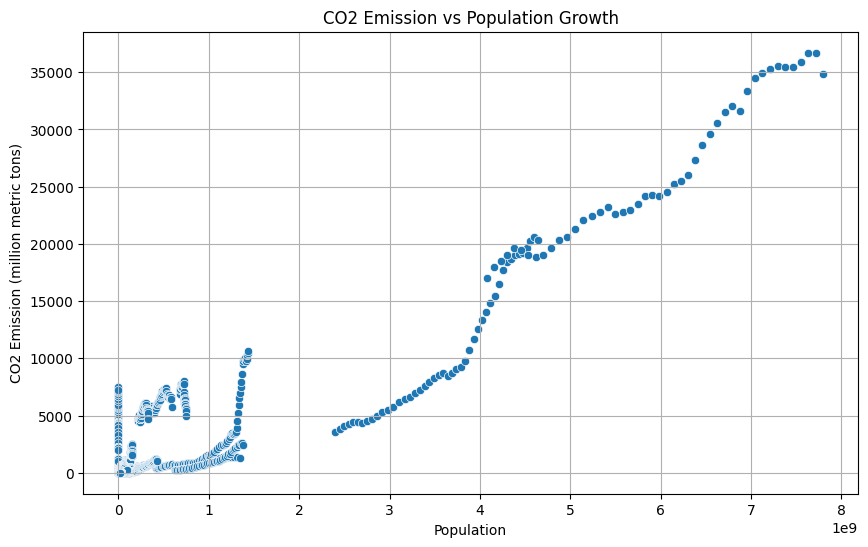

In [48]:
# Analysis 17: CO2 Emission and Population Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y='co2')
plt.title('CO2 Emission vs Population Growth')
plt.xlabel('Population')
plt.ylabel('CO2 Emission (million metric tons)')
plt.grid(True)
plt.show()

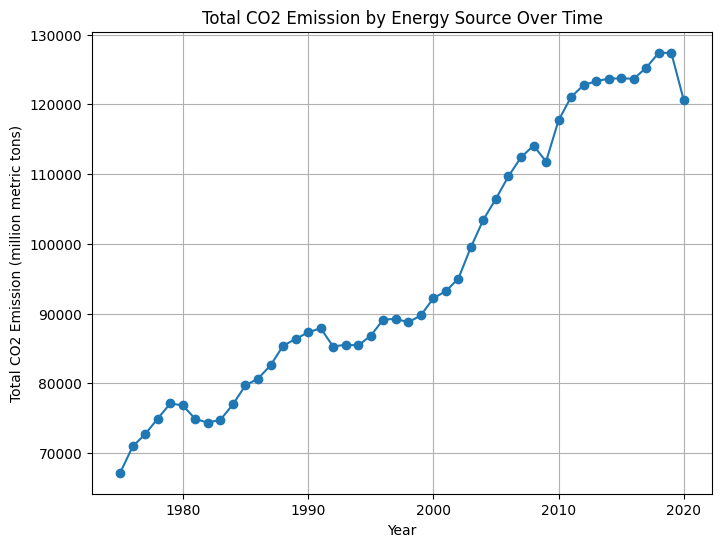

In [50]:
# Analysis 19: CO2 Emission by Energy Source
energy_sources = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2']
df['total_energy_co2'] = df[energy_sources].sum(axis=1)
plt.figure(figsize=(8, 6))
df.groupby('year')['total_energy_co2'].sum().plot(kind='line', marker='o')
plt.title('Total CO2 Emission by Energy Source Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (million metric tons)')
plt.grid(True)
plt.show()

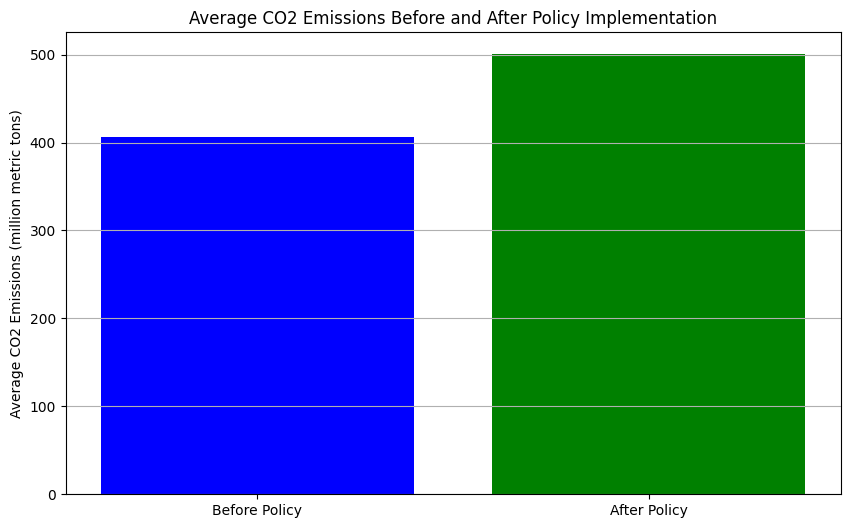

In [52]:
# Example of CO2 Emission and Policy Analysis
# Assume 'policy_year' is the year when the policy was implemented
policy_year = 2020

# Calculate average CO2 emissions before and after the policy
pre_policy_co2 = df[df['year'] < policy_year]['co2'].mean()
post_policy_co2 = df[df['year'] >= policy_year]['co2'].mean()

# Visualize CO2 emissions before and after the policy
plt.figure(figsize=(10, 6))
plt.bar(['Before Policy', 'After Policy'], [pre_policy_co2, post_policy_co2], color=['blue', 'green'])
plt.title('Average CO2 Emissions Before and After Policy Implementation')
plt.ylabel('Average CO2 Emissions (million metric tons)')
plt.grid(axis='y')
plt.show()
